In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

## Data import and cleaning...

In [10]:
plt.rcParams['axes.labelsize'] = 8    
plt.rcParams['axes.titlesize'] = 9    
plt.rcParams['xtick.labelsize'] = 8   
plt.rcParams['ytick.labelsize'] = 8 
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['font.family']='Arial'

In [11]:
custom_order = [
        'centerE16N4geo50000', 'centerE16N4geo100000', 'centerE16N4geo150000',
        'centerE9N9geo50000', 'centerE9N9geo100000', 'centerE9N9geo150000',
        'centerE6N4geo50000', 'centerE6N4geo100000', 'centerE6N4geo150000',
        'uniformgeo',
        'centerX19Y4pca0.0015', 'centerX19Y4pca0.0025', 'centerX19Y4pca0.005',
        'uniformpca'
    ]

In [12]:
sfs_data = pd.read_csv('sfs_binned_summary.csv') # from format_sfs_data
sfs_data

,Variant_Type,Panel,Bin_Center,Binned_SFS,Binned_Std
0,synonymous,H,1.414214,19.513923,0.196042
1,synonymous,H,2.828427,4.282202,0.206784
2,synonymous,H,5.656854,3.647889,0.237968
3,synonymous,H,11.661904,2.049816,0.320769
4,synonymous,H,24.392622,1.163884,0.327609
...,...,...,...,...,...
163,lof,C,5.656854,0.571942,0.023813
164,lof,C,11.661904,0.241226,0.018186
165,lof,C,24.392622,0.169037,0.028117
166,lof,C,59.160798,0.114349,0.074369


In [13]:
# heterozygosity files computed in ../empirical/subsampling_SIR_v20250127/notebooks/heterozygosity_v20250324
# values already scaled appropriately
het_all = pd.read_csv('../empirical/subsampling_SIR_v20250127/notebooks/bias_corrected_het_results_allvariants_v20250324.csv')
het_all

,Scenario,Mean_LOF,Std_LOF,Mean_Missense,Std_Missense,Mean_Synonymous,Std_Synonymous
0,centerE16N4geo50000,0.000126,1.442202e-07,0.001120,4.122287e-07,0.001354,3.375281e-07
1,centerE16N4geo100000,0.000126,1.205725e-07,0.001119,2.599756e-07,0.001354,3.742045e-07
2,centerE16N4geo150000,0.000126,1.090142e-07,0.001119,2.697779e-07,0.001354,4.909204e-07
3,centerE9N9geo50000,0.000126,1.084409e-07,0.001119,2.443623e-07,0.001352,3.485041e-07
4,centerE9N9geo100000,0.000125,1.219919e-07,0.001119,2.437955e-07,0.001352,5.500902e-07
5,centerE9N9geo150000,0.000126,1.316985e-07,0.001119,3.401039e-07,0.001353,4.979505e-07
6,centerE6N4geo50000,0.000126,1.619771e-07,0.001120,2.701536e-07,0.001351,5.833635e-07
7,centerE6N4geo100000,0.000126,1.193245e-07,0.001120,3.317795e-07,0.001352,4.221496e-07
8,centerE6N4geo150000,0.000126,1.127962e-07,0.001120,3.386740e-07,0.001353,3.017209e-07
9,uniformgeo,0.000126,1.424430e-07,0.001119,3.006043e-07,0.001354,2.846032e-07


In [14]:
het_seg = pd.read_csv('../empirical/subsampling_SIR_v20250127/notebooks/bias_corrected_het_results_segregatingonly_v20250324.csv')
het_seg

,Scenario,Mean_LOF,Std_LOF,Mean_Missense,Std_Missense,Mean_Synonymous,Std_Synonymous
0,centerE16N4geo50000,0.001206,0.000022,0.007343,0.000135,0.008395,0.000142
1,centerE16N4geo100000,0.000962,0.000022,0.005993,0.000128,0.006951,0.000125
2,centerE16N4geo150000,0.000921,0.000010,0.005828,0.000104,0.006731,0.000114
3,centerE9N9geo50000,0.001617,0.000030,0.009208,0.000134,0.010633,0.000131
4,centerE9N9geo100000,0.001177,0.000019,0.007051,0.000104,0.008256,0.000126
5,centerE9N9geo150000,0.001072,0.000017,0.006502,0.000090,0.007621,0.000130
6,centerE6N4geo50000,0.001744,0.000033,0.010117,0.000177,0.011387,0.000208
7,centerE6N4geo100000,0.001100,0.000026,0.006810,0.000172,0.007917,0.000106
8,centerE6N4geo150000,0.000972,0.000013,0.006090,0.000082,0.007117,0.000106
9,uniformgeo,0.000963,0.000013,0.005999,0.000134,0.007038,0.000130


In [15]:
geo_rows = het_all[het_all['Scenario'].str.contains(r'geo\d+$', regex=True)].copy()
geo_rows['geo_group'] = het_all['Scenario'].str.extract(r'(geo\d+)$')
geo_aggregated = geo_rows.groupby('geo_group', as_index=False).agg({
    'Mean_LOF': 'mean', 'Std_LOF': 'mean',
    'Mean_Missense': 'mean', 'Std_Missense': 'mean',
    'Mean_Synonymous': 'mean', 'Std_Synonymous': 'mean'
}).rename(columns={'geo_group': 'Scenario'})  # Rename to match original structure

het_all_avg = het_all[~het_all['Scenario'].str.contains(r'geo\d+$', regex=True)]
het_all_avg = pd.concat([het_all_avg, geo_aggregated], ignore_index=True)
het_all_avg = het_all_avg.reindex([7,5,6,0,1,2,3,4]).reset_index(drop=True)
het_all_avg

,Scenario,Mean_LOF,Std_LOF,Mean_Missense,Std_Missense,Mean_Synonymous,Std_Synonymous
0,geo50000,0.000126,1.382127e-07,0.001120,3.089148e-07,0.001352,4.231319e-07
1,geo100000,0.000126,1.206296e-07,0.001119,2.785169e-07,0.001353,4.488148e-07
2,geo150000,0.000126,1.178363e-07,0.001119,3.161853e-07,0.001353,4.301973e-07
3,uniformgeo,0.000126,1.424430e-07,0.001119,3.006043e-07,0.001354,2.846032e-07
4,centerX19Y4pca0.0015,0.000130,1.265208e-07,0.001125,3.594697e-07,0.001383,5.309577e-07
5,centerX19Y4pca0.0025,0.000131,1.667909e-07,0.001127,3.082678e-07,0.001401,7.375238e-07
6,centerX19Y4pca0.005,0.000134,2.423692e-07,0.001132,3.989999e-07,0.001432,7.082092e-07
7,uniformpca,0.000136,1.337295e-07,0.001134,3.171039e-07,0.001463,5.348099e-07


In [41]:
het_all_avg.iloc[7][1]

0.0001355930846338

In [37]:
het_all_avg.iloc[0][1]

0.00012596605856043334

In [38]:
geo_rows = het_seg[het_seg['Scenario'].str.contains(r'geo\d+$', regex=True)].copy()
geo_rows['geo_group'] = het_seg['Scenario'].str.extract(r'(geo\d+)$')
geo_aggregated = geo_rows.groupby('geo_group', as_index=False).agg({
    'Mean_LOF': 'mean', 'Std_LOF': 'mean',
    'Mean_Missense': 'mean', 'Std_Missense': 'mean',
    'Mean_Synonymous': 'mean', 'Std_Synonymous': 'mean'
}).rename(columns={'geo_group': 'Scenario'})  # Rename to match original structure

het_seg_avg = het_seg[~het_seg['Scenario'].str.contains(r'geo\d+$', regex=True)]
het_seg_avg = pd.concat([het_seg_avg, geo_aggregated], ignore_index=True)
het_seg_avg = het_seg_avg.reindex([7,5,6,0,1,2,3,4]).reset_index(drop=True)
het_seg_avg

,Scenario,Mean_LOF,Std_LOF,Mean_Missense,Std_Missense,Mean_Synonymous,Std_Synonymous
0,geo50000,0.001522,0.000028,0.008889,0.000149,0.010138,0.000160
1,geo100000,0.001080,0.000022,0.006618,0.000134,0.007708,0.000119
2,geo150000,0.000989,0.000013,0.006140,0.000092,0.007156,0.000116
3,uniformgeo,0.000963,0.000013,0.005999,0.000134,0.007038,0.000130
4,centerX19Y4pca0.0015,0.001100,0.000017,0.005794,0.000128,0.006229,0.000094
5,centerX19Y4pca0.0025,0.001142,0.000018,0.005755,0.000104,0.006151,0.000076
6,centerX19Y4pca0.005,0.001109,0.000014,0.005486,0.000076,0.005896,0.000066
7,uniformpca,0.001053,0.000013,0.005174,0.000112,0.005640,0.000068


In [17]:
mean_segsites_lof = []
std_segsites_lof = []
mean_segsites_missense = []
std_segsites_missense = []
mean_segsites_synonymous = []
std_segsites_synonymous = []

mean_singletons_lof = []
std_singletons_lof = []
mean_singletons_missense = []
std_singletons_missense = []
mean_singletons_synonymous = []
std_singletons_synonymous = []

for vt in ['lof','missense','synonymous']:
    for scenario in custom_order:
        sfs = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs/chr1_{vt}_{scenario}_nSIR10000_nSIRreps10.SIRsfs', delimiter='\s+')
        grouped=sfs[(sfs['OBS_N']>0)&(sfs['OBS_N']<10000)].groupby('SIR_REP')['COUNT_SITES'].sum()
        grouped_sing = sfs[sfs['OBS_N']==1].groupby('SIR_REP')['COUNT_SITES'].sum()
        if vt is 'lof':
            mean_segsites_lof.append(grouped.mean())
            std_segsites_lof.append(grouped.std())
            mean_singletons_lof.append(grouped_sing.mean())
            std_singletons_lof.append(grouped_sing.std())
        elif vt is 'missense':
            mean_segsites_missense.append(grouped.mean())
            std_segsites_missense.append(grouped.std())
            mean_singletons_missense.append(grouped_sing.mean())
            std_singletons_missense.append(grouped_sing.std())
        elif vt is 'synonymous':
            mean_segsites_synonymous.append(grouped.mean())
            std_segsites_synonymous.append(grouped.std())    
            mean_singletons_synonymous.append(grouped_sing.mean())
            std_singletons_synonymous.append(grouped_sing.std())
            

In [18]:
# scale factors computed as in format_sfs_data:
# if vt=='synonymous':
#         scale_factor = len_syn*prop_kept_syn # also divide by prop kept
# elif vt=='missense':
#     scale_factor = len_mis*prop_kept_mis # also divide by prop kept
# elif vt=='lof':
#     scale_factor = len_lof

scale_factor_lof = 167.616
scale_factor_mis = 167.10810974979066
scale_factor_syn = 170.89337073897704

In [19]:
# loop over i in below code averages the results for samples w/ same breadth, different centers

mean_segsites_lof = [x / scale_factor_lof for x in [(mean_segsites_lof[i] + mean_segsites_lof[i+3] + mean_segsites_lof[i+6]) / 3 for i in range(3)] + mean_segsites_lof[9:]]
mean_segsites_missense = [x / scale_factor_mis for x in [(mean_segsites_missense[i] + mean_segsites_missense[i+3] + mean_segsites_missense[i+6]) / 3 for i in range(3)] + mean_segsites_missense[9:]]
mean_segsites_synonymous = [x / scale_factor_syn for x in [(mean_segsites_synonymous[i] + mean_segsites_synonymous[i+3] + mean_segsites_synonymous[i+6]) / 3 for i in range(3)] + mean_segsites_synonymous[9:]]
mean_singletons_lof = [x / scale_factor_lof for x in [(mean_singletons_lof[i] + mean_singletons_lof[i+3] + mean_singletons_lof[i+6]) / 3 for i in range(3)] + mean_singletons_lof[9:]]
mean_singletons_missense = [x / scale_factor_mis for x in [(mean_singletons_missense[i] + mean_singletons_missense[i+3] + mean_singletons_missense[i+6]) / 3 for i in range(3)] + mean_singletons_missense[9:]]
mean_singletons_synonymous = [x / scale_factor_syn for x in [(mean_singletons_synonymous[i] + mean_singletons_synonymous[i+3] + mean_singletons_synonymous[i+6]) / 3 for i in range(3)] + mean_singletons_synonymous[9:]]

std_segsites_lof = [x / scale_factor_lof for x in [(std_segsites_lof[i] + std_segsites_lof[i+3] + std_segsites_lof[i+6]) / 3 for i in range(3)] + std_segsites_lof[9:]]
std_segsites_missense = [x / scale_factor_mis for x in [(std_segsites_missense[i] + std_segsites_missense[i+3] + std_segsites_missense[i+6]) / 3 for i in range(3)] + std_segsites_missense[9:]]
std_segsites_synonymous = [x / scale_factor_syn for x in [(std_segsites_synonymous[i] + std_segsites_synonymous[i+3] + std_segsites_synonymous[i+6]) / 3 for i in range(3)] + std_segsites_synonymous[9:]]
std_singletons_lof = [x / scale_factor_lof for x in [(std_singletons_lof[i] + std_singletons_lof[i+3] + std_singletons_lof[i+6]) / 3 for i in range(3)] + std_singletons_lof[9:]]
std_singletons_missense = [x / scale_factor_mis for x in [(std_singletons_missense[i] + std_singletons_missense[i+3] + std_singletons_missense[i+6]) / 3 for i in range(3)] + std_singletons_missense[9:]]
std_singletons_synonymous = [x / scale_factor_syn for x in [(std_singletons_synonymous[i] + std_singletons_synonymous[i+3] + std_singletons_synonymous[i+6]) / 3 for i in range(3)] + std_singletons_synonymous[9:]]


In [20]:
mean_stdev_df = pd.read_csv('ratios.csv')
mean_stdev_df = mean_stdev_df[mean_stdev_df['Variant Type']=='lof']

mean_stdev_df_pca = pd.read_csv('ratios_pca.csv')
mean_stdev_df_pca = mean_stdev_df_pca[mean_stdev_df_pca['Variant Type']=='lof']

In [57]:
# mean_stdev_df

In [58]:
# std_segsites_lof

## Figure 6

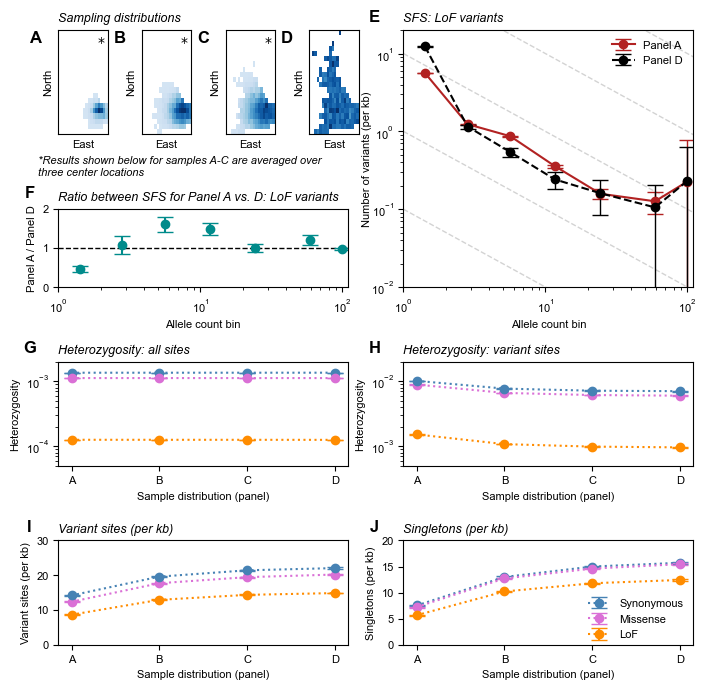

In [29]:
fig = plt.figure(figsize=(7.01, 7.01))
gs = gridspec.GridSpec(4, 8, figure=fig, height_ratios=[1, 0.75, 1, 1])
axes = {}
gs_top = gridspec.GridSpecFromSubplotSpec(1, 8, subplot_spec=gs[0, :], wspace=0.7)
for i in range(4):
    ax = fig.add_subplot(gs_top[0, i])
    ax.set_xticks([])
    ax.set_yticks([])
    axes[f'square_{i + 1}'] = ax
    ax.text(-0.45, 1, chr(65 + i), fontsize=12, weight='bold',
            ha='center', va='top', transform=ax.transAxes)
    ax.set_xlabel('East')
    ax.set_ylabel('North')
    if i < 3:
        ax.text(0.95, 0.95, r'$*$', transform=ax.transAxes, ha='right', va='top', fontsize=10)
    if i == 0:
        ax.set_title('Sampling distributions', fontstyle='italic', loc='left')
        
axes['panel_F'] = fig.add_subplot(gs[1, :4])
axes['panel_F'].set_title('Ratio between SFS for Panel A vs. D: LoF variants', fontstyle='italic', loc='left')

axes['panel_E'] = fig.add_subplot(gs[:2, 4:])
axes['panel_E'].set_title('SFS: LoF variants', fontstyle='italic', loc='left')

axes['panel_G'] = fig.add_subplot(gs[2, 0:4])
axes['panel_I'] = fig.add_subplot(gs[3, 0:4])
axes['panel_H'] = fig.add_subplot(gs[2, 4:])
axes['panel_J'] = fig.add_subplot(gs[3, 4:])


### HEATMAPS ###
df = pd.read_csv('../empirical/subsampling_SIR_v20250127/metadata/metadata_cleaned_wes.csv')
## geo ##
df_geo = df[(df['birth_east_coord'].notna()) & (df['birth_UKelsewhere'] != 'Elsewhere') & (df['used_in_pca'] == 1) & (df['within_1epsilon_pca'] == True)]
cmap = plt.get_cmap('Blues')
cmap = ListedColormap(cmap(np.linspace(0.18, 1, cmap.N)))
cmap.set_under('white')
x = df_geo['birth_east_coord']
y = df_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x, y, bins=20)
w_list = ['50000', '100000', '150000']
centers = ['centerE16N4', 'centerE9N9', 'centerE6N4']
c = centers[0]
for j, w in enumerate(w_list):
    idlist = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/ids/chr1_synonymous_{c}geo{w}_nSIR10000_nSIRreps10.SIRexamples', delimiter=' ', header=None)
    ids = idlist[idlist[1] == 0]
    ids.rename(columns={2: 'id'}, inplace=True)
    temp = pd.merge(df_geo, ids, on=['id'], how='inner')
    hist_temp = axes[f'square_{j+1}'].hist2d(temp['birth_east_coord'], temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap, vmin=1e-8)

idlist_unif = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/ids/chr1_synonymous_uniformgeo_nSIR10000_nSIRreps10.SIRexamples', sep=' ', header=None)
ids_unif = idlist_unif[idlist_unif[1] == 0]
ids_unif.rename(columns={2: 'id'}, inplace=True)
temp = pd.merge(df_geo, ids_unif, on=['id'], how='inner')
hist_temp = axes['square_4'].hist2d(temp['birth_east_coord'], temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap, vmin=1e-8)

### SFS ### 
colors=['firebrick','black']

sfs_lof = sfs_data[sfs_data['Variant_Type']=='lof']

x = np.logspace(0, 4)
y = x**-1
for ax in [axes['panel_E']]:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('Number of variants (per kb)',labelpad=-1)
    ax.set_xlabel('Allele count bin')
    ax.set_ylim(1e-2,2e1)
    ax.set_xlim(1e0,110)
    ax.loglog(x, y, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 10, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 100, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 1000, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 10000, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y / 100, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y / 10, color='lightgray', linestyle='--',linewidth=1)

panel_data_A_D = sfs_lof[sfs_lof['Panel'].isin(['A', 'D'])]
lt = ['-','--']
for i, panel in enumerate(['A', 'D']):
    panel_data = panel_data_A_D[panel_data_A_D['Panel'] == panel]
    axes['panel_E'].errorbar(panel_data['Bin_Center'], panel_data['Binned_SFS'], yerr=2*panel_data['Binned_Std']/np.sqrt(10), 
                label=f"Panel {panel}", linestyle=lt[i], marker='o', capsize=6, markersize=6, elinewidth=1, alpha=1, color=colors[i])

axes['panel_E'].legend(loc='upper right',ncol=1,frameon=False)
axes['panel_F'].set_xscale('log')
# axes['panel_F'].set_yscale('log')
axes['panel_F'].set_ylim(0,2)
# axes['panel_F'].set_yscale('symlog',linthresh=1e-10)
axes['panel_F'].set_xlim(1e0,110)
axes['panel_F'].set_xlabel('Allele count bin')
axes['panel_F'].set_ylabel('Panel A / Panel D')
axes['panel_F'].axhline(y=1, color='black', linestyle='--', linewidth=1)
axes['panel_F'].errorbar(mean_stdev_df['bin center'], mean_stdev_df['ratio'], yerr=2*mean_stdev_df['stdev']/np.sqrt(10), fmt='o', 
            capsize=6, markersize=6,linestyle='None', color='#008B8B')


# ##### SUM STATS ######

vartypes = ['synonymous','missense','lof']
colors_vt = ['steelblue','orchid','darkorange']
# lt=['-','dotted','--']
labels = ['A','B','C','D']#,'E','F','G','H']
axes['panel_G'].errorbar(labels,het_all_avg['Mean_Synonymous'][:4],2*het_all_avg['Std_Synonymous'][:4]/np.sqrt(10),fmt='o',linestyle='dotted',color=colors_vt[0],label="Synonymous",capsize=6,markersize=6)
axes['panel_G'].errorbar(labels,het_all_avg['Mean_Missense'][:4],2*het_all_avg['Std_Missense'][:4]/np.sqrt(10),fmt='o',linestyle='dotted',color=colors_vt[1],label="Missense",capsize=6,markersize=6)
axes['panel_G'].errorbar(labels,het_all_avg['Mean_LOF'][:4],2*het_all_avg['Std_LOF'][:4]/np.sqrt(10),fmt='o',linestyle='dotted',color=colors_vt[2],label="LoF",capsize=6,markersize=6)

axes['panel_G'].set_yscale('log')
axes['panel_G'].set_ylim(5e-5,2e-3)#(5e-5,5e-1)

# axes['panel2'].legend(loc='lower right',frameon=False,bbox_to_anchor=(1, 0.1))

axes['panel_H'].errorbar(labels,het_seg_avg['Mean_LOF'][:4],2*het_seg_avg['Std_LOF'][:4]/np.sqrt(10),fmt='o',linestyle='dotted',color=colors_vt[2],label="LoF",capsize=6,markersize=6)
axes['panel_H'].errorbar(labels,het_seg_avg['Mean_Missense'][:4],2*het_seg_avg['Std_Missense'][:4]/np.sqrt(10),fmt='o',linestyle='dotted',color=colors_vt[1],label="Missense",capsize=6,markersize=6)
axes['panel_H'].errorbar(labels,het_seg_avg['Mean_Synonymous'][:4],2*het_seg_avg['Std_Synonymous'][:4]/np.sqrt(10),fmt='o',linestyle='dotted',color=colors_vt[0],label="Synonymous",capsize=6,markersize=6)
axes['panel_H'].set_ylim(5e-4,2e-2)#(5e-5,5e-1)
axes['panel_H'].set_yscale('log')

axes['panel_I'].errorbar(labels,mean_segsites_lof[:4],[2*x/np.sqrt(10) for x in std_segsites_lof[:4]],fmt='o',linestyle='dotted',color=colors_vt[2],label="LoF",capsize=6,markersize=6)
axes['panel_I'].errorbar(labels,mean_segsites_missense[:4],[2*x/np.sqrt(10) for x in std_segsites_missense[:4]],fmt='o',linestyle='dotted',color=colors_vt[1],label="Missense",capsize=6,markersize=6)
axes['panel_I'].errorbar(labels,mean_segsites_synonymous[:4],[2*x/np.sqrt(10) for x in std_segsites_synonymous[:4]],fmt='o',linestyle='dotted',color=colors_vt[0],label="Synonymous",capsize=6,markersize=6)
axes['panel_I'].set_ylim(0,3e1)

axes['panel_J'].errorbar(labels,mean_singletons_synonymous[:4],[2*x/np.sqrt(10) for x in std_singletons_synonymous[:4]],fmt='o',linestyle='dotted',color=colors_vt[0],label="Synonymous",capsize=6,markersize=6)
axes['panel_J'].errorbar(labels,mean_singletons_missense[:4],[2*x/np.sqrt(10) for x in std_singletons_missense[:4]],fmt='o',linestyle='dotted',color=colors_vt[1],label="Missense",capsize=6,markersize=6)
axes['panel_J'].errorbar(labels,mean_singletons_lof[:4],[2*x/np.sqrt(10) for x in std_singletons_lof[:4]],fmt='o',linestyle='dotted',color=colors_vt[2],label="LoF",capsize=6,markersize=6)
axes['panel_J'].legend(loc='lower right',frameon=False,bbox_to_anchor=(1, -0.05))
axes['panel_J'].set_ylim(0,2e1)

axes['panel_I'].set_ylabel('Variant sites (per kb)')
axes['panel_J'].set_ylabel('Singletons (per kb)')
axes['panel_G'].set_ylabel('Heterozygosity')
axes['panel_H'].set_ylabel('Heterozygosity')

axes['panel_I'].set_title('Variant sites (per kb)',loc='left',fontstyle='italic')
axes['panel_J'].set_title('Singletons (per kb)',loc='left',fontstyle='italic')
axes['panel_G'].set_title('Heterozygosity: all sites',loc='left',fontstyle='italic')
axes['panel_H'].set_title('Heterozygosity: variant sites',loc='left',fontstyle='italic')

axes['panel_I'].set_xlabel('Sample distribution (panel)')
axes['panel_J'].set_xlabel('Sample distribution (panel)')
axes['panel_G'].set_xlabel('Sample distribution (panel)')
axes['panel_H'].set_xlabel('Sample distribution (panel)')


axes['panel_E'].text(-0.1, 1.08, 'E', fontsize=12, weight='bold', 
                          ha='center', va='top', transform=axes['panel_E'].transAxes)
axes['panel_F'].text(-0.1, 1.3, 'F', fontsize=12, weight='bold', 
                          ha='center', va='top', transform=axes['panel_F'].transAxes)
axes['panel_G'].text(-0.1, 1.2, 'G', fontsize=12, weight='bold', 
                          ha='center', va='top', transform=axes['panel_G'].transAxes)
axes['panel_H'].text(-0.1, 1.2, 'H', fontsize=12, weight='bold', 
                          ha='center', va='top', transform=axes['panel_H'].transAxes)
axes['panel_I'].text(-0.1, 1.2, 'I', fontsize=12, weight='bold', 
                          ha='center', va='top', transform=axes['panel_I'].transAxes)
axes['panel_J'].text(-0.1, 1.2, 'J', fontsize=12, weight='bold', 
                          ha='center', va='top', transform=axes['panel_J'].transAxes)
fig.text(0.05,0.73,'*Results shown below for samples A-C are averaged over\nthree center locations',ha='left',fontsize=8,fontstyle='italic')

plt.tight_layout(pad=0.5)
plt.savefig('fig6_v20250324.pdf')

## Supplementary figures

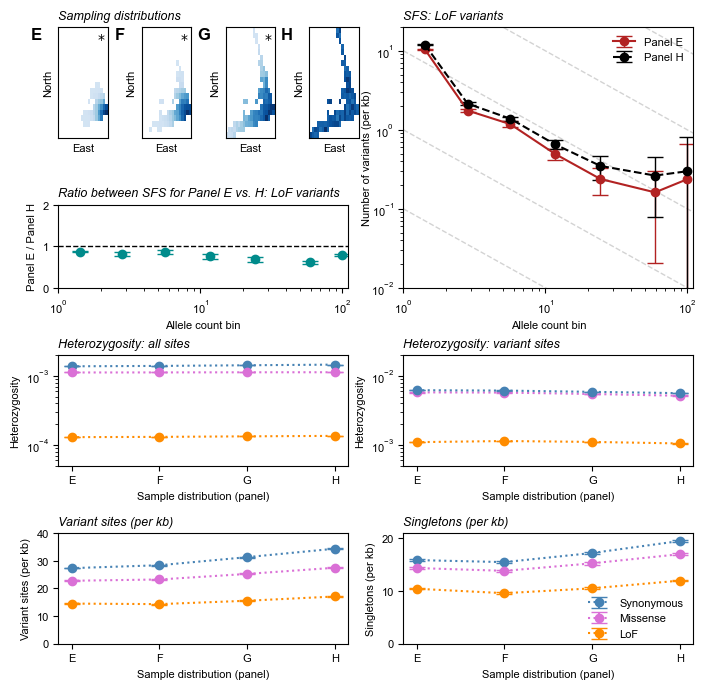

In [28]:
fig = plt.figure(figsize=(7.01, 7.01))
gs = gridspec.GridSpec(4, 8, figure=fig, height_ratios=[1, 0.75, 1, 1])
axes = {}
gs_top = gridspec.GridSpecFromSubplotSpec(1, 8, subplot_spec=gs[0, :], wspace=0.7)
for i in range(4):
    ax = fig.add_subplot(gs_top[0, i])
    ax.set_xticks([])
    ax.set_yticks([])
    axes[f'square_{i + 1}'] = ax
    ax.text(-0.45, 1, chr(65 + i+4), fontsize=12, weight='bold',
            ha='center', va='top', transform=ax.transAxes)
    ax.set_xlabel('East')
    ax.set_ylabel('North')
    if i < 3:
        ax.text(0.95, 0.95, r'$*$', transform=ax.transAxes, ha='right', va='top', fontsize=10)
    if i == 0:
        ax.set_title('Sampling distributions', fontstyle='italic', loc='left')
        
axes['panel_F'] = fig.add_subplot(gs[1, :4])
axes['panel_F'].set_title('Ratio between SFS for Panel E vs. H: LoF variants', fontstyle='italic', loc='left')

axes['panel_E'] = fig.add_subplot(gs[:2, 4:])
axes['panel_E'].set_title('SFS: LoF variants', fontstyle='italic', loc='left')

axes['panel_G'] = fig.add_subplot(gs[2, 0:4])
axes['panel_I'] = fig.add_subplot(gs[3, 0:4])
axes['panel_H'] = fig.add_subplot(gs[2, 4:])
axes['panel_J'] = fig.add_subplot(gs[3, 4:])


### HEATMAPS ###
df = pd.read_csv('../empirical/subsampling_SIR_v20250127/metadata/metadata_cleaned_wes.csv')
## geo ##
df_pca = df[(df['used_in_pca'] == 1)]
w_list = [0.0015, 0.0025, 0.005]
centers = ['centerX19Y4', 'centerX0Y0', 'centerX12Y19'] 
cmap = plt.get_cmap('Blues')
cmap = ListedColormap(cmap(np.linspace(0.18, 1, cmap.N)))
cmap.set_under('white')
x = df_pca['PC1']
y = df_pca['PC2']
counts, xedges, yedges = np.histogram2d(x, y, bins=20)
c = centers[0]
for j, w in enumerate(w_list):
    idlist = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/ids/chr1_synonymous_{c}pca{w}_nSIR10000_nSIRreps10.SIRexamples', delimiter=' ', header=None)
    ids = idlist[idlist[1] == 0]
    ids.rename(columns={2: 'id'}, inplace=True)
    temp = pd.merge(df_pca, ids, on=['id'], how='inner')
    hist_temp = axes[f'square_{j+1}'].hist2d(temp['PC1'], temp['PC2'], bins=[xedges, yedges], cmap=cmap, vmin=1e-8)

idlist_unif = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/ids/chr1_synonymous_uniformpca_nSIR10000_nSIRreps10.SIRexamples', sep=' ', header=None)
ids_unif = idlist_unif[idlist_unif[1] == 0]
ids_unif.rename(columns={2: 'id'}, inplace=True)
temp = pd.merge(df_pca, ids_unif, on=['id'], how='inner')
hist_temp = axes['square_4'].hist2d(temp['PC1'], temp['PC2'], bins=[xedges, yedges], cmap=cmap, vmin=1e-8)

### SFS ### 
colors=['firebrick','black']

sfs_lof = sfs_data[sfs_data['Variant_Type']=='lof']

x = np.logspace(0, 4)
y = x**-1
for ax in [axes['panel_E']]:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('Number of variants (per kb)',labelpad=-1)
    ax.set_xlabel('Allele count bin')
    ax.set_ylim(1e-2,2e1)
    ax.set_xlim(1e0,110)
    ax.loglog(x, y, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 10, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 100, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 1000, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 10000, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y / 100, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y / 10, color='lightgray', linestyle='--',linewidth=1)

panel_data_E_G = sfs_lof[sfs_lof['Panel'].isin(['E', 'H'])]
lt = ['-','--']
for i, panel in enumerate(['E', 'H']):
    panel_data = panel_data_E_G[panel_data_E_G['Panel'] == panel]
    axes['panel_E'].errorbar(panel_data['Bin_Center'], panel_data['Binned_SFS'], yerr=2*panel_data['Binned_Std']/np.sqrt(10), 
                label=f"Panel {panel}", linestyle=lt[i], marker='o', capsize=6, markersize=6, elinewidth=1, alpha=1, color=colors[i])

axes['panel_E'].legend(loc='upper right',ncol=1,frameon=False)
axes['panel_F'].set_xscale('log')
# axes['panel_F'].set_yscale('log')
axes['panel_F'].set_ylim(0,2)
# axes['panel_F'].set_yscale('symlog',linthresh=1e-10)
axes['panel_F'].set_xlim(1e0,110)
axes['panel_F'].set_xlabel('Allele count bin')
axes['panel_F'].set_ylabel('Panel E / Panel H')
axes['panel_F'].axhline(y=1, color='black', linestyle='--', linewidth=1)
axes['panel_F'].errorbar(mean_stdev_df_pca['bin center'], mean_stdev_df_pca['ratio'], yerr=2*mean_stdev_df_pca['stdev']/np.sqrt(10), fmt='o', 
            capsize=6, markersize=6,linestyle='None', color='#008B8B')


# ##### SUM STATS ######

vartypes = ['synonymous','missense','lof']
colors_vt = ['steelblue','orchid','darkorange']
# lt=['-','dotted','--']
labels = ['E','F','G','H']
axes['panel_G'].errorbar(labels,het_all_avg['Mean_Synonymous'][4:],2*het_all_avg['Std_Synonymous'][4:]/np.sqrt(10),fmt='o',linestyle='dotted',color=colors_vt[0],label="Synonymous",capsize=6,markersize=6)
axes['panel_G'].errorbar(labels,het_all_avg['Mean_Missense'][4:],2*het_all_avg['Std_Missense'][4:]/np.sqrt(10),fmt='o',linestyle='dotted',color=colors_vt[1],label="Missense",capsize=6,markersize=6)
axes['panel_G'].errorbar(labels,het_all_avg['Mean_LOF'][4:],2*het_all_avg['Std_LOF'][4:]/np.sqrt(10),fmt='o',linestyle='dotted',color=colors_vt[2],label="LoF",capsize=6,markersize=6)

axes['panel_G'].set_yscale('log')
axes['panel_G'].set_ylim(5e-5,2e-3)#(5e-5,5e-1)

# axes['panel2'].legend(loc='lower right',frameon=False,bbox_to_anchor=(1, 0.1))

axes['panel_H'].errorbar(labels,het_seg_avg['Mean_LOF'][4:],2*het_seg_avg['Std_LOF'][4:]/np.sqrt(10),fmt='o',linestyle='dotted',color=colors_vt[2],label="LoF",capsize=6,markersize=6)
axes['panel_H'].errorbar(labels,het_seg_avg['Mean_Missense'][4:],2*het_seg_avg['Std_Missense'][4:]/np.sqrt(10),fmt='o',linestyle='dotted',color=colors_vt[1],label="Missense",capsize=6,markersize=6)
axes['panel_H'].errorbar(labels,het_seg_avg['Mean_Synonymous'][4:],2*het_seg_avg['Std_Synonymous'][4:]/np.sqrt(10),fmt='o',linestyle='dotted',color=colors_vt[0],label="Synonymous",capsize=6,markersize=6)
axes['panel_H'].set_ylim(5e-4,2e-2)#(5e-5,5e-1)
axes['panel_H'].set_yscale('log')

axes['panel_I'].errorbar(labels,mean_segsites_lof[4:],[2*x/np.sqrt(10) for x in std_segsites_lof[4:]],fmt='o',linestyle='dotted',color=colors_vt[2],label="LoF",capsize=6,markersize=6)
axes['panel_I'].errorbar(labels,mean_segsites_missense[4:],[2*x/np.sqrt(10) for x in std_segsites_missense[4:]],fmt='o',linestyle='dotted',color=colors_vt[1],label="Missense",capsize=6,markersize=6)
axes['panel_I'].errorbar(labels,mean_segsites_synonymous[4:],[2*x/np.sqrt(10) for x in std_segsites_synonymous[4:]],fmt='o',linestyle='dotted',color=colors_vt[0],label="Synonymous",capsize=6,markersize=6)
axes['panel_I'].set_ylim(0,4e1)

axes['panel_J'].errorbar(labels,mean_singletons_synonymous[4:],[2*x/np.sqrt(10) for x in std_singletons_synonymous[4:]],fmt='o',linestyle='dotted',color=colors_vt[0],label="Synonymous",capsize=6,markersize=6)
axes['panel_J'].errorbar(labels,mean_singletons_missense[4:],[2*x/np.sqrt(10) for x in std_singletons_missense[4:]],fmt='o',linestyle='dotted',color=colors_vt[1],label="Missense",capsize=6,markersize=6)
axes['panel_J'].errorbar(labels,mean_singletons_lof[4:],[2*x/np.sqrt(10) for x in std_singletons_lof[4:]],fmt='o',linestyle='dotted',color=colors_vt[2],label="LoF",capsize=6,markersize=6)
axes['panel_J'].legend(loc='lower right',frameon=False,bbox_to_anchor=(1, -0.05))
axes['panel_J'].set_ylim(0,21)

axes['panel_I'].set_ylabel('Variant sites (per kb)')
axes['panel_J'].set_ylabel('Singletons (per kb)')
axes['panel_G'].set_ylabel('Heterozygosity')
axes['panel_H'].set_ylabel('Heterozygosity')

axes['panel_I'].set_title('Variant sites (per kb)',loc='left',fontstyle='italic')
axes['panel_J'].set_title('Singletons (per kb)',loc='left',fontstyle='italic')
axes['panel_G'].set_title('Heterozygosity: all sites',loc='left',fontstyle='italic')
axes['panel_H'].set_title('Heterozygosity: variant sites',loc='left',fontstyle='italic')

axes['panel_I'].set_xlabel('Sample distribution (panel)')
axes['panel_J'].set_xlabel('Sample distribution (panel)')
axes['panel_G'].set_xlabel('Sample distribution (panel)')
axes['panel_H'].set_xlabel('Sample distribution (panel)')


# axes['panel_E'].text(-0.1, 1.08, 'E', fontsize=12, weight='bold', 
#                           ha='center', va='top', transform=axes['panel_E'].transAxes)
# axes['panel_F'].text(-0.1, 1.2, 'F', fontsize=12, weight='bold', 
#                           ha='center', va='top', transform=axes['panel_F'].transAxes)
# axes['panel_G'].text(-0.1, 1.2, 'G', fontsize=12, weight='bold', 
#                           ha='center', va='top', transform=axes['panel_G'].transAxes)
# axes['panel_H'].text(-0.1, 1.2, 'H', fontsize=12, weight='bold', 
#                           ha='center', va='top', transform=axes['panel_H'].transAxes)
# axes['panel_I'].text(-0.1, 1.2, 'I', fontsize=12, weight='bold', 
#                           ha='center', va='top', transform=axes['panel_I'].transAxes)
# axes['panel_J'].text(-0.1, 1.2, 'J', fontsize=12, weight='bold', 
#                           ha='center', va='top', transform=axes['panel_J'].transAxes)
# fig.text(0.05,0.73,'*Results shown below for samples A-C are averaged over\nthree center locations',ha='left',fontsize=8,fontstyle='italic')

plt.tight_layout(pad=0.5)
plt.savefig('suppfigpca_v20250324.pdf')

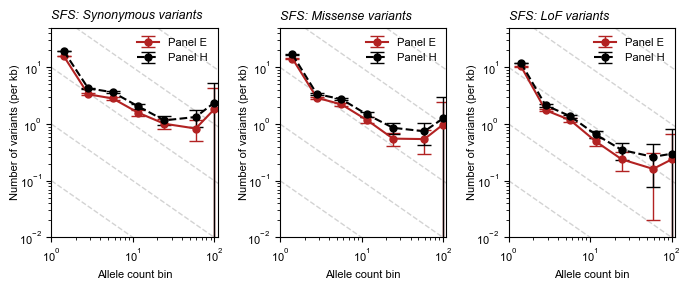

In [30]:
fig,axs = plt.subplots(1,3,figsize=(7.01,3))

### SFS ### 
colors=['firebrick','black']

x = np.logspace(0, 4)
y = x**-1
for ax in axs:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('Number of variants (per kb)',labelpad=-1)
    ax.set_xlabel('Allele count bin')
    ax.set_ylim(1e-2,5e1)
    ax.set_xlim(1e0,110)
    ax.loglog(x, y, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 10, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 100, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 1000, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 10000, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y / 100, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y / 10, color='lightgray', linestyle='--',linewidth=1)

vartypes=['synonymous','missense','lof']
vtcap = ['SFS: Synonymous variants','SFS: Missense variants','SFS: LoF variants']
panels = ['E','H']
lt = ['-','--']
for i,vt in enumerate(vartypes):
    sfs_vt = sfs_data[sfs_data['Variant_Type']==vt]
    panel_data = sfs_vt[sfs_vt['Panel'].isin(panels)]
    for j,panel in enumerate(panels):
        temp = panel_data[panel_data['Panel']==panel]
        axs[i].errorbar(temp['Bin_Center'],temp['Binned_SFS'],yerr=2*temp['Binned_Std']/np.sqrt(10),
                       label=f"Panel {panel}", linestyle = lt[j],marker='o', capsize=5, markersize=5, elinewidth=1, alpha=1, color=colors[j])

    axs[i].set_title(vtcap[i],fontstyle='italic',loc='left')
    axs[i].legend(loc='upper right',ncol=1,frameon=False)
plt.tight_layout()
plt.savefig('pca_sfs_EH.pdf')

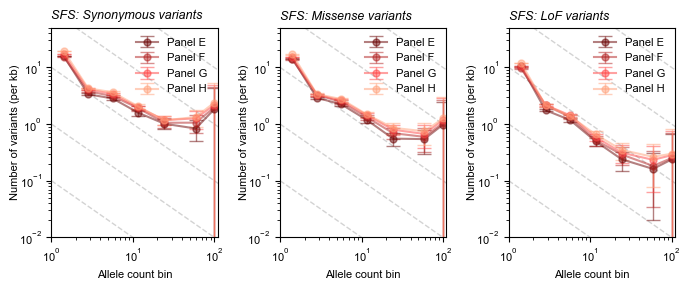

In [31]:
fig,axs = plt.subplots(1,3,figsize=(7.01,3))

### SFS ### 
# colors=['firebrick','black']
colors = ["#690000", "#B22222", "#FF4444", "#FFA07A"]

x = np.logspace(0, 4)
y = x**-1
for ax in axs:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('Number of variants (per kb)',labelpad=-1)
    ax.set_xlabel('Allele count bin')
    ax.set_ylim(1e-2,5e1)
    ax.set_xlim(1e0,110)
    ax.loglog(x, y, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 10, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 100, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 1000, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 10000, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y / 100, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y / 10, color='lightgray', linestyle='--',linewidth=1)

vartypes=['synonymous','missense','lof']
vtcap = ['SFS: Synonymous variants','SFS: Missense variants','SFS: LoF variants']
panels = ['E','F','G','H']
# lt = ['-','--']
for i,vt in enumerate(vartypes):
    sfs_vt = sfs_data[sfs_data['Variant_Type']==vt]
    panel_data = sfs_vt[sfs_vt['Panel'].isin(panels)]
    for j,panel in enumerate(panels):
        temp = panel_data[panel_data['Panel']==panel]
        axs[i].errorbar(temp['Bin_Center'],temp['Binned_SFS'],yerr=2*temp['Binned_Std']/np.sqrt(10),
                       label=f"Panel {panel}", linestyle = '-',marker='o', capsize=5, markersize=5, elinewidth=1, alpha=0.5, color=colors[j])

    axs[i].set_title(vtcap[i],fontstyle='italic',loc='left')
    axs[i].legend(loc='upper right',ncol=1,frameon=False)
plt.tight_layout()
plt.savefig('pca_sfs_all.pdf')

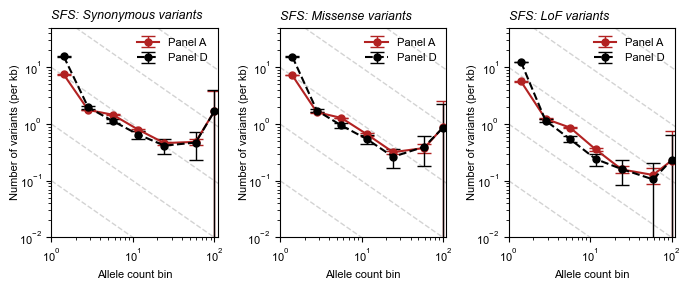

In [32]:
fig,axs = plt.subplots(1,3,figsize=(7.01,3))

### SFS ### 
colors=['firebrick','black']

x = np.logspace(0, 4)
y = x**-1
for ax in axs:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('Number of variants (per kb)',labelpad=-1)
    ax.set_xlabel('Allele count bin')
    ax.set_ylim(1e-2,5e1)
    ax.set_xlim(1e0,110)
    ax.loglog(x, y, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 10, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 100, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 1000, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 10000, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y / 100, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y / 10, color='lightgray', linestyle='--',linewidth=1)

vartypes=['synonymous','missense','lof']
vtcap = ['SFS: Synonymous variants','SFS: Missense variants','SFS: LoF variants']
panels = ['A','D']
lt = ['-','--']
for i,vt in enumerate(vartypes):
    sfs_vt = sfs_data[sfs_data['Variant_Type']==vt]
    panel_data = sfs_vt[sfs_vt['Panel'].isin(panels)]
    for j,panel in enumerate(panels):
        temp = panel_data[panel_data['Panel']==panel]
        axs[i].errorbar(temp['Bin_Center'],temp['Binned_SFS'],yerr=2*temp['Binned_Std']/np.sqrt(10),
                       label=f"Panel {panel}", linestyle = lt[j],marker='o', capsize=5, markersize=5, elinewidth=1, alpha=1, color=colors[j])

    axs[i].set_title(vtcap[i],fontstyle='italic',loc='left')
    axs[i].legend(loc='upper right',ncol=1,frameon=False)
plt.tight_layout()
plt.savefig('geo_sfs_AD.pdf')

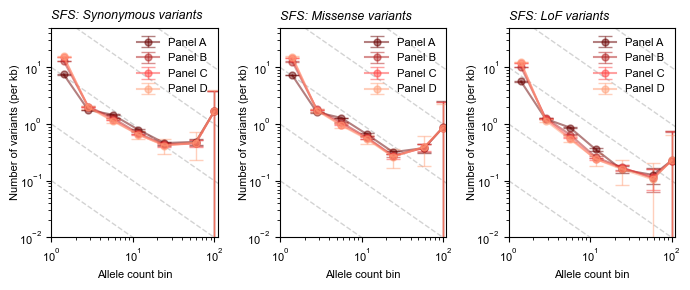

In [33]:
fig,axs = plt.subplots(1,3,figsize=(7.01,3))

### SFS ### 
# colors=['firebrick','black']
colors = ["#690000", "#B22222", "#FF4444", "#FFA07A"]





x = np.logspace(0, 4)
y = x**-1
for ax in axs:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('Number of variants (per kb)',labelpad=-1)
    ax.set_xlabel('Allele count bin')
    ax.set_ylim(1e-2,5e1)
    ax.set_xlim(1e0,110)
    ax.loglog(x, y, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 10, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 100, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 1000, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y * 10000, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y / 100, color='lightgray', linestyle='--',linewidth=1)
    ax.loglog(x, y / 10, color='lightgray', linestyle='--',linewidth=1)

vartypes=['synonymous','missense','lof']
vtcap = ['SFS: Synonymous variants','SFS: Missense variants','SFS: LoF variants']
panels = ['A','B','C','D']
# lt = ['-','-','-','--']
for i,vt in enumerate(vartypes):
    sfs_vt = sfs_data[sfs_data['Variant_Type']==vt]
    panel_data = sfs_vt[sfs_vt['Panel'].isin(panels)]
    for j,panel in enumerate(panels):
        temp = panel_data[panel_data['Panel']==panel]
        axs[i].errorbar(temp['Bin_Center'],temp['Binned_SFS'],yerr=2*temp['Binned_Std']/np.sqrt(10),
                       label=f"Panel {panel}", linestyle = '-',marker='o', capsize=5, markersize=5, elinewidth=1, alpha=0.5, color=colors[j])

    axs[i].set_title(vtcap[i],fontstyle='italic',loc='left')
    axs[i].legend(loc='upper right',ncol=1,frameon=False)
plt.tight_layout()
plt.savefig('geo_sfs_all.pdf')

In [34]:
mean_stdev_df = pd.read_csv('ratios.csv')
# mean_stdev_df = mean_stdev_df[mean_stdev_df['Variant Type']=='lof']

mean_stdev_df_pca = pd.read_csv('ratios_pca.csv')
# mean_stdev_df_pca = mean_stdev_df_pca[mean_stdev_df_pca['Variant Type']=='lof']

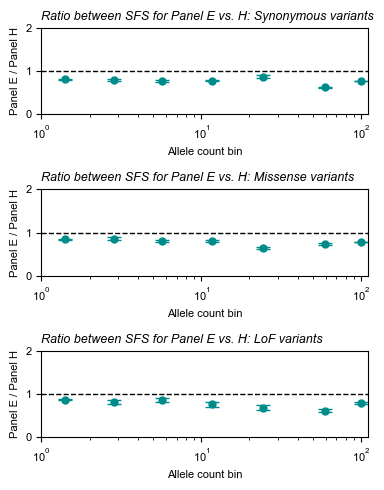

In [35]:
fig,ax = plt.subplots(3,1,figsize=(4,5))
vtcap = ['Ratio between SFS for Panel E vs. H: Synonymous variants','Ratio between SFS for Panel E vs. H: Missense variants','Ratio between SFS for Panel E vs. H: LoF variants']
for i, vt in enumerate(vartypes):

    ax[i].set_xscale('log')
    ax[i].set_ylim(0,2)
    ax[i].set_xlim(1e0,110)
    ax[i].set_xlabel('Allele count bin')
    ax[i].set_ylabel('Panel E / Panel H')
    ax[i].axhline(y=1, color='black', linestyle='--', linewidth=1)
    temp = mean_stdev_df_pca[mean_stdev_df_pca['Variant Type']==vt]
    ax[i].errorbar(temp['bin center'], temp['ratio'], yerr=2*temp['stdev']/np.sqrt(10), fmt='o', 
                capsize=5, markersize=5,linestyle='None', color='#008B8B')
    ax[i].set_title(vtcap[i],fontstyle='italic',loc='left')
plt.tight_layout()
plt.savefig('ratios_EH.pdf')

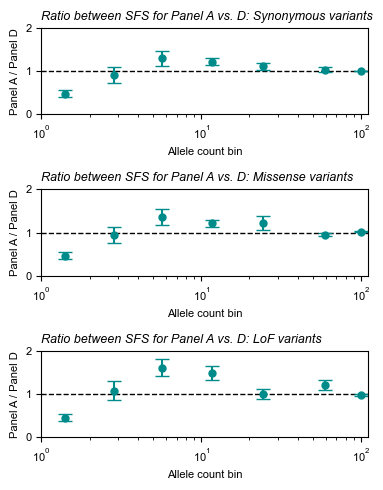

In [36]:
fig,ax = plt.subplots(3,1,figsize=(4,5))
vtcap = ['Ratio between SFS for Panel A vs. D: Synonymous variants','Ratio between SFS for Panel A vs. D: Missense variants','Ratio between SFS for Panel A vs. D: LoF variants']

for i, vt in enumerate(vartypes):

    ax[i].set_xscale('log')
    ax[i].set_ylim(0,2)
    ax[i].set_xlim(1e0,110)
    ax[i].set_xlabel('Allele count bin')
    ax[i].set_ylabel('Panel A / Panel D')
    ax[i].axhline(y=1, color='black', linestyle='--', linewidth=1)
    temp = mean_stdev_df[mean_stdev_df['Variant Type']==vt]
    ax[i].errorbar(temp['bin center'], temp['ratio'], yerr=2*temp['stdev']/np.sqrt(10), fmt='o', 
                capsize=5, markersize=5,linestyle='None', color='#008B8B')
    ax[i].set_title(vtcap[i],fontstyle='italic',loc='left')
plt.tight_layout()
plt.savefig('ratios_AD.pdf')